# Predicting Breast Cancer 

In [ ]:
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf 
import os
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import svm, datasets 
from sklearn.model_selection import cross_val_score 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from statistics import mean
import seaborn as sns; sns.set()
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import log_loss, make_scorer, f1_score, SCORERS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import Normalizer


**Background**:

Breast cancer is the most common cancer among women in the world. It account for 25% of all cancer cases, and affected over 2.1 Million people in 2015. It starts when cells in the breast begin to grow out of control. These cells usually form a tumor that can often be seen on an X-ray or felt as a lump.

Early diagnosis significantly increases the chances of surviver. The key challenges against it's detection is how to classify tumors into malignant(Cancer) or benign(not cancer). A tumor is considered malignant (Cancer) if the cells can grow into surrounding tissues or spread to distant areas of the body. A benign tumor does not invade nearby tissue or spread to other parts of the body the way cancer can. But benign tumors can be serious if they press on vital structures such as blood vessel or nerves.

Machine Learning technique can dramatically improve the level of diagnosis in breast cancer. Research shows that experience physicians can detect cancer by 79% accuracy, while 91%(up to 97%) accuracy can be achieved using Machine Learning techniques.

**Aim**

In this study, my task is to classify tumors into malignant (cancer) or benign using features obtained from several cell images.

**Attribute Information:**

ID number
Diagnosis (M = malignant, B = benign)
Ten real-valued features are computed for each cell nucleus:

Radius (mean of distances from center to points on the perimeter)
Texture (standard deviation of gray-scale values)
Perimeter
Area
Smoothness (local variation in radius lengths)
Compactness (perimeter^2 / area - 1.0)
Concavity (severity of concave portions of the contour)
Concave points (number of concave portions of the contour)
Symmetry
Fractal dimension ("coastline approximation" - 1)

In [ ]:
df = pd.read_csv("data 2.csv")

In [ ]:
df.head(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN


In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id                         3.037183e+07
radius_mean                1.412729e+01
texture_mean               1.928965e+01
perimeter_mean             9.196903e+01
area_mean                  6.548891e+02
smoothness_mean            9.636028e-02
compactness_mean           1.043410e-01
concavity_mean             8.879932e-02
concave points_mean        4.891915e-02
symmetry_mean              1.811619e-01
fractal_dimension_mean     6.279761e-02
radius_se                  4.051721e-01
texture_se                 1.216853e+00
perimeter_se               2.866059e+00
area_se                    4.033708e+01
smoothness_se              7.040979e-03
compactness_se             2.547814e-02
concavity_se               3.189372e-02
concave points_se          1.179614e-02
symmetry_se                2.054230e-02
fractal_dimension_se       3.794904e-03
radius_worst               1.626919e+01
texture_worst              2.567722e+01
perimeter_worst            1.072612e+02
area_worst                 8.805831e+02


In [ ]:
df.isnull().sum()
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.iloc[:, 1:] #delete second column
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.drop(df.columns[len(df.columns)-1], axis=1, inplace=True) #delete the last column

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Visualise the data 

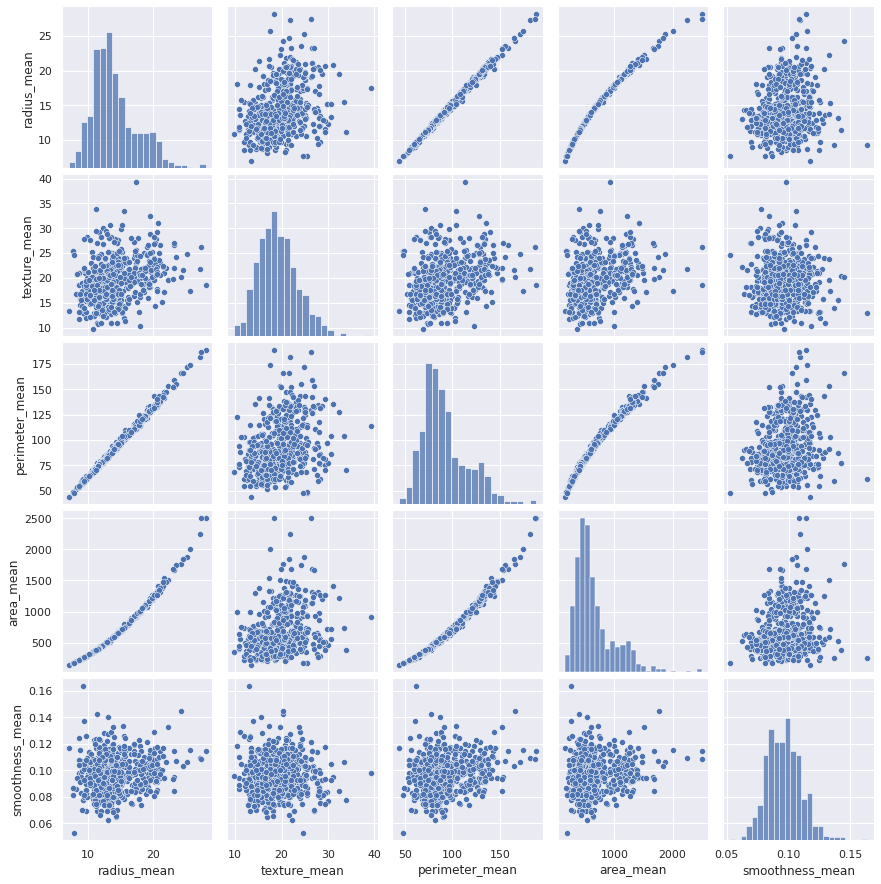

In [ ]:
sns.pairplot(df, vars = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean'] )

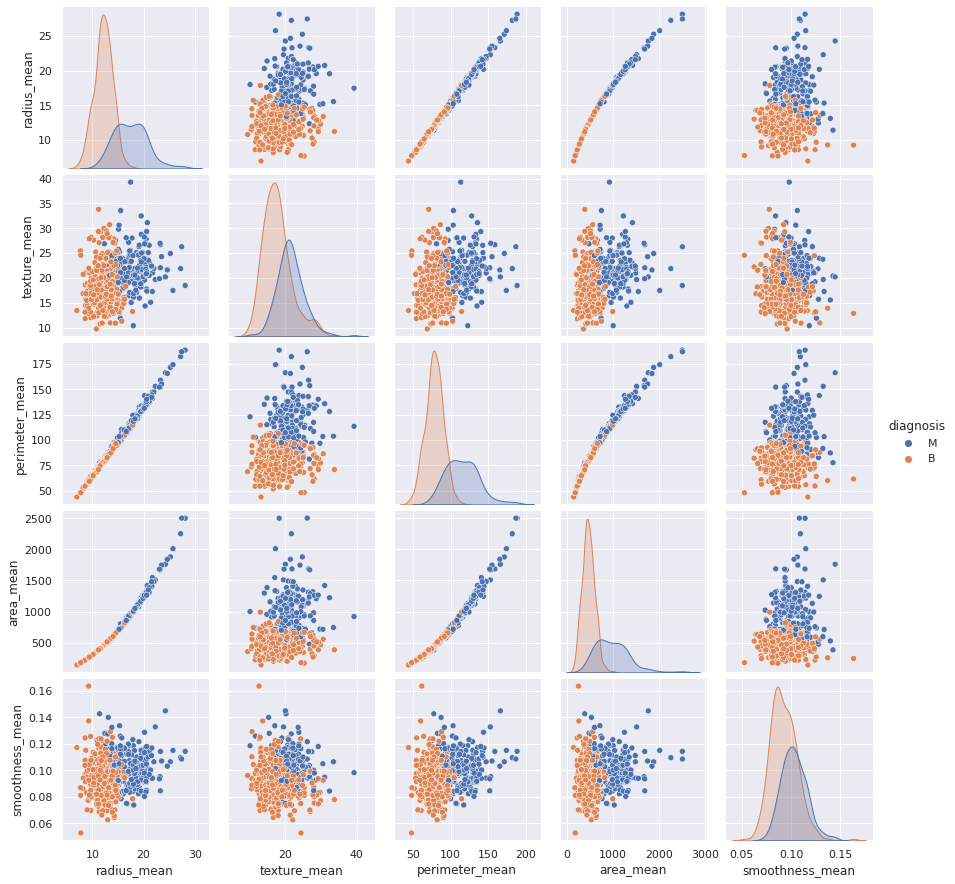

In [ ]:
# Let's plot out just the first 5 variables (features)
sns.pairplot(df, hue = 'diagnosis', vars = ['radius_mean','texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean'])

For the visualistions above
1.0 (Orange) = Benign (No Cancer)

0.0 (Blue) = Malignant (Cancer)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


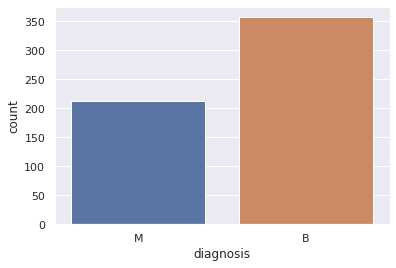

In [ ]:
sns.countplot(df['diagnosis'], label = "Count") 

The visualisation below shows the corelations between various features 

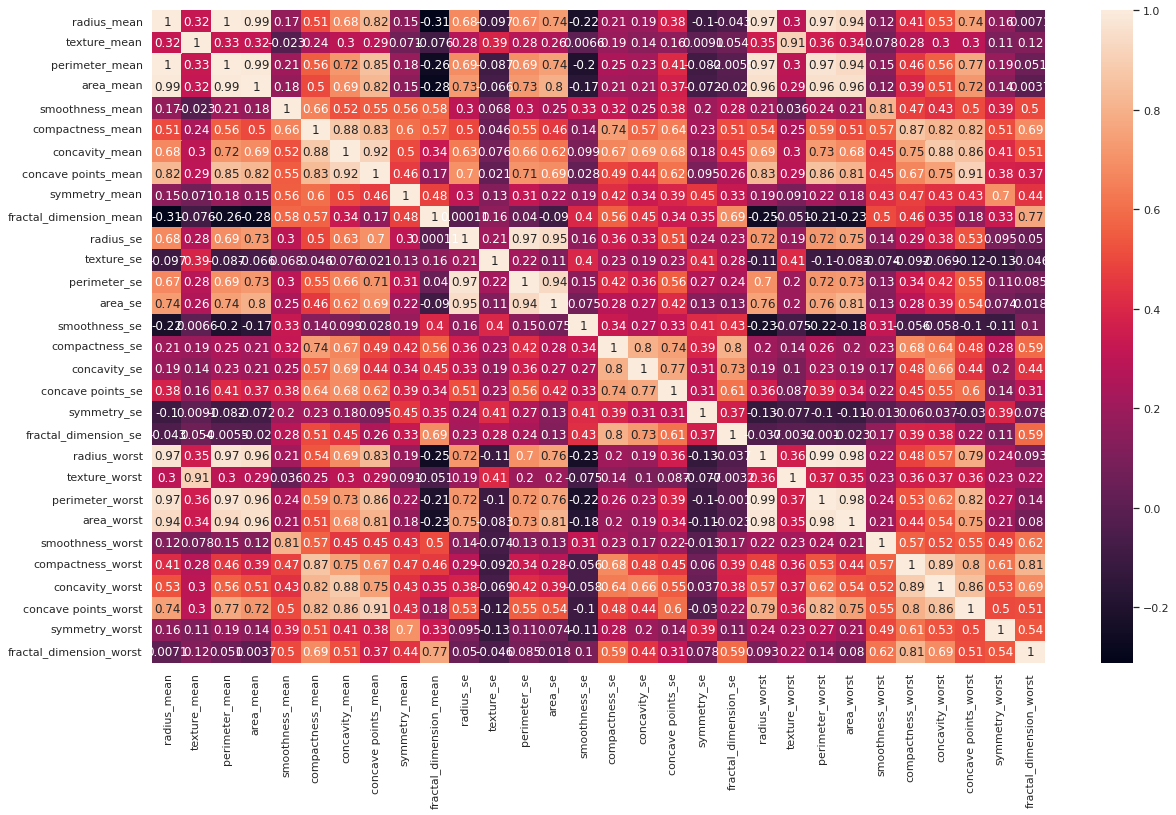

In [ ]:
plt.figure(figsize=(20,12)) 
sns.heatmap(df.corr(), annot=True) 

# Logistic Regression

Using radius mean as the dependant variable 

In [ ]:
y = df['diagnosis'] 
X = df.loc[:, df.columns != 'diagnosis']

print(y[0:5])
X.head() 

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df = pd.DataFrame(y)

In [ ]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0) 

In [ ]:
# preprocessing the data by scaling it 

scaler = preprocessing.StandardScaler()
scaler = StandardScaler().fit(X_train) 
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [ ]:
logreg = LogisticRegression(C=1e90, max_iter=1000000).fit(X_train, Y_train)
print("logreg .coef_: {}".format(logreg .coef_))
print("Training set score: {:.3f}".format(logreg.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, Y_test)))

predicted_vals = logreg.predict(X_test) 
print("logreg.predict: {}".format(predicted_vals))

logreg .coef_: [[ 4.14471544e+00  5.39427017e-01 -1.25465075e+00  7.45912001e-03
   2.99215871e+01 -3.43799223e+01  1.65425034e+01  6.63148439e+01
   3.70893066e+01 -5.38426588e+00  9.88398698e+00 -1.27753174e+00
  -2.04589827e+00  4.92183597e-01  8.31937289e-01 -8.17300879e+01
  -8.95721905e+01  2.39287656e+00 -1.90096302e+01 -1.50585250e+01
   8.95344016e-01  3.28553448e-01  4.14093742e-01  1.45665003e-04
   4.16966813e+01 -1.92999045e+01  2.68173174e+01  1.08629727e+02
   1.98035989e+01  4.84902019e+00]]
Training set score: 0.986
Test set score: 0.937
logreg.predict: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1]


In [ ]:
# using Gridsearch CV on scaled data 

param_grid = {"C":[.001, .01,.1,1,10,100]}
grid = GridSearchCV(LogisticRegression( penalty='none', max_iter=100000), param_grid=param_grid, cv=3, scoring = "accuracy")
grid.fit(X_train_scaled, Y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, Y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

best mean cross-validation score: 0.958
best parameters: {'C': 0.001}
test-set score: 0.944


In [ ]:
# using scaled data

cross_val_score(logreg, X_train_scaled, Y_train, cv = 3)
print(np.mean(cross_val_score(logreg, X_train_scaled, Y_train, cv = 3, scoring = "accuracy")))

0.9577464788732394


In [ ]:
# using scaled data 

kfold = KFold(n_splits=5)
print("KFold:\n{}".format(
mean(cross_val_score(LogisticRegression(max_iter = 10000000), X_train_scaled, Y_train, cv=kfold))))

KFold:
0.9788508891928864


# k Nearest Neighbours

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(X_train, Y_train)
print("accuracy: {:.4f}".format(knn.score(X_test, Y_test))) 
knn.score(X_test, Y_test)

accuracy: 0.9580


0.958041958041958

In [ ]:
# using scaled data 

knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(X_train_scaled, Y_train)
print("accuracy: {:.4f}".format(knn.score(X_test_scaled, Y_test))) 
knn.score(X_test_scaled, Y_test)

accuracy: 0.9510


0.951048951048951

In [ ]:
# using Gridsearch CV on scaled data

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
print(knn_pipe.steps)

param_grid = {'kneighborsclassifier__n_neighbors': np.arange(1,99,2)} 
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train_scaled, Y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, Y_test)))

[('standardscaler', StandardScaler()), ('kneighborsclassifier', KNeighborsClassifier())]
best mean cross-validation score: 0.965
best parameters: {'kneighborsclassifier__n_neighbors': 9}
test-set score: 0.951


In [ ]:
# using scaled data 

knn= KNeighborsClassifier()

cross_val_score(knn, X_train_scaled, Y_train, cv = 10)
print(np.mean(cross_val_score(knn, X_train_scaled, Y_train, cv = 10, scoring = "accuracy")))

0.9648394241417497


In [ ]:
# using scaled data 

kfold = KFold(n_splits=5)

print("KFold:\n{}".format(
mean(cross_val_score(KNeighborsClassifier(), X_train_scaled, Y_train, cv=kfold))))

KFold:
0.9624897400820793


# Support Vector Machines

In [ ]:
svc = SVC(kernel='linear', C=1) 
svc.fit(X_train, Y_train)
svc.score(X_test, Y_test)

print("Training set score: {:.3f}".format(svc.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(svc.score(X_test, Y_test)))
print("SVM .coef_: {}".format(svc.coef_))

Training set score: 0.967
Test set score: 0.958
SVM .coef_: [[-0.54526597 -0.05180606  0.0016595  -0.00322667  0.22533875  0.17929188
   0.34353891  0.25438842  0.4468757   0.0268069   0.03783591 -0.90145958
  -0.18771935  0.08407991  0.019871   -0.11853385 -0.04369621  0.02343681
   0.02778776 -0.02842816 -0.13298239  0.22162408  0.15574849  0.00210703
   0.36495938  0.75900064  1.45001498  0.52413621  0.91868292  0.09920673]]


In [ ]:
# using scaled data 

svc.fit(X_train_scaled, Y_train)
svc.score(X_test_scaled, Y_test)

print("Training set score: {:.3f}".format(svc.score(X_train_scaled, Y_train)))
print("Test set score: {:.3f}".format(svc.score(X_test_scaled, Y_test)))
print("SVM .coef_: {}".format(svc.coef_))

Training set score: 0.986
Test set score: 0.972
SVM .coef_: [[ 0.14065396  0.25174365  0.21039192  0.25949266 -0.08437156 -0.30126902
   0.55409328  0.55859075  0.46280735 -0.06691584  0.88193512 -0.30923917
   0.84803346  0.83544694  0.40373623 -0.86376673 -0.22782582  0.52741728
  -0.30968394 -0.76924464  0.5203384   0.69574311  0.64818414  0.72912662
   0.12197716 -0.29089794  0.83838972  0.40124931  0.40462269  0.91771917]]


In [ ]:
# using Gridsearch CV 

param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(svc, param_grid)

%time grid.fit(X_train, Y_train)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

CPU times: user 4min 56s, sys: 17.7 ms, total: 4min 56s
Wall time: 4min 59s
{'C': 50, 'gamma': 0.0001}
SVC(C=50, gamma=0.0001, kernel='linear')
0.9553761969904242


In [ ]:
# using Gridsearch CV on scaled data 

param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(svc, param_grid)

%time grid.fit(X_train_scaled, Y_train)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

CPU times: user 431 ms, sys: 0 ns, total: 431 ms
Wall time: 430 ms
{'C': 1, 'gamma': 0.0001}
SVC(C=1, gamma=0.0001, kernel='linear')
0.9835567715458277


In [ ]:
# using scaled data

cross_val_score(svc, X_train_scaled, Y_train, cv = 10)
print(np.mean(cross_val_score(svc, X_train_scaled, Y_train, cv = 10, scoring = "accuracy")))

0.9743632336655592


In [ ]:
# using scaled data 

kfold = KFold(n_splits=5)

print("KFold:\n{}".format(
mean(cross_val_score(svc, X_train, Y_train, cv=kfold))))

KFold:
0.95296853625171


# Decision Trees

In [ ]:
# using scaled data 

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

model = tree.fit(X,y)

tree.fit(X_train_scaled, Y_train)
tree.score(X_test_scaled, Y_test)

print("Training set score: {:.4f}".format(tree.score(X_train_scaled, Y_train)))
print("Test set score: {:.4f}".format(tree.score(X_test_scaled, Y_test)))

Training set score: 1.0000
Test set score: 0.8881


In [ ]:
# using Gridsearch CV 

param_grid = {'max_depth' : [5, 6, 7, 8, 9]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_train, Y_train)

print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, Y_test)))

best parameters: {'max_depth': 5}
test-set score: 0.930


In [ ]:
# using Gridsearch CV on scaled data 

param_grid = {'max_depth' : [5, 6, 7, 8, 9]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_train_scaled, Y_train)

print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, Y_test)))

best parameters: {'max_depth': 7}
test-set score: 0.909


In [ ]:
# using scaled data

cross_val_score(tree, X_train_scaled, Y_train, cv = 10)
print(np.mean(cross_val_score(tree, X_train_scaled, Y_train, cv = 10, scoring = "accuracy")))

0.9225359911406423


In [ ]:
# using scaled data 

kfold = KFold(n_splits=5)

print("KFold:\n{}".format(
mean(cross_val_score(tree, X_train_scaled, Y_train, cv=kfold))))

KFold:
0.9154856361149111


## Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100,), random_state=43, max_iter=1000, learning_rate='adaptive')
nn_model.fit(X_train_scaled, Y_train)
nn_accuracy = nn_model.score(X_test_scaled, Y_test)
print(f"Accuracy of MLP Classifier is:{nn_accuracy}")

Accuracy of MLP Classifier is:0.972027972027972
